# Sources of Opacity

Within the ejecta there are several sources of opacity for the $\gamma$-rays that we need to take into account.

## Pair Creation

This form of opacity is dominant when the energy of the $\gamma$-ray is greater than or equal to $2m_e c^2$.
It occurs when a $\gamma$-ray passes a nucleus and creates an electron-positron pair. The positron forms a bound-state with an electron called positronium which decay into two photons at 0.511 MeV or three photons. 
The photon packet keeps its energy but is sent into a new direction.
The pair-production coefficients are:

$$
\alpha_{pp}(1.5 < h\nu < 1.022) = \rho \left[ \frac{Z_{\text{Si}}^2}{m_{\text{Si}}} (1 - X_{\text{IGE}}) + \frac{Z_{\text{Fe}}^2}{m_{\text{Fe}}} X_{\text{IGE}} \right] 1.0063 (h\nu - 1.022) \times 10^{-27}
$$

$$
\alpha_{pp}(h\nu \geq 1.5) = \rho \left[ \frac{Z_{\text{Si}}^2}{m_{\text{Si}}} (1 - X_{\text{IGE}}) + \frac{Z_{\text{Fe}}^2}{m_{\text{Fe}}} X_{\text{IGE}} \right] \left[ 0.481 + 0.301(h\nu - 1.5) \right] \times 10^{-27}
$$


$\rho$ is the mass density of the ejecta and $X_{\text{IGE}}$ is the mass fraction of Fe-group elements.

## Compton Scattering

Compton scattering is inelastic scattering that occurs when a high frequency photon collides with an electron. Unlike Thomson scattering, which is elastic, during the collision some of the energy from the photon is transferred to the electron and the scattered photon is lower energy than the incident photon. 
This means that the scattered photon also has a lower frequency and a longer wavelength. In the simulation we assume that the electrons are moving significantly slower than the photons.
To find the energy of the scattered photon we use the equation we multiply the initial energy with the compton fraction $f_C$

$$
f_C = \frac{1}{1 + x(1 - \cos{\theta})}
$$

Where $\theta$ is the angle the photon is scattered at and $x = \frac{h \nu}{m_e c^2}$

The partial cross section from 0 to $\theta$ in terms of f is:

$$
\sigma(f) = \frac{3 \sigma_T}{8x} \frac{\left( x^2 - 2x - 2 \right) \ln(f)}{x^2} + \frac{f^2 - 1}{2f^2} +  \frac{f - 1}{x} [\frac{1}{x} + 2f + \frac{1}{xf}]
$$
   
Where $f$ can range from $1$ to $1+2x$ and $\sigma_T$ is the Thomson scattering cross section.

The scattering angle is given by:

$$
\theta_C = \cos^{-1}({1 - \frac{f-1}{x}})
$$

The total integrated Compton scattering coeffcient is:

$$
\alpha_C = n_e \frac{3}{4} \sigma_T [\frac{1+x}{x^3} (\frac{2x(1 + x)}{1 + 2x} - \ln(1 + 2x)) + \frac{1}{2x} \ln(1 + 2x) - \frac{1 + 3x}{(1 + 2x)^2}]
$$

Where $n_e$ is the number density of electrons.

The direction vector is then rotated by $\theta$ to get the new direction and the frequency is updated.

## Photoabsorption

This occurs when the photon is completely absorbed by a material. We assume that the $\gamma$-ray deposits all of its energy when this occurs.
The coefficient is:

$$
\alpha_{pa}(\nu) = 1.16 \times 10^{-24} (h\nu)^{-3.13}  \frac{\rho}{m_{\text{Si}}} (1 - X_{\text{IGE}}) + 25.7 \times 10^{-24} (h\nu)^{-3}  \frac{\rho}{m_{\text{Fe}}} X_{\text{IGE}}
$$

## Code example

Each source of opacity has its own function. The following cells demonstrate how each function works and how the opacities are implemented in the code.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tardis.opacities.opacities import compton_opacity_calculation
from tardis.opacities.opacities import photoabsorption_opacity_calculation
from tardis.opacities.opacities import pair_creation_opacity_calculation

In [3]:
# Creating an array of packet energies from 100 KeV to 10000 KeV
energies = np.arange(10, 10000, 0.01)

Text(0.5, 1.0, 'Pair Production Opacity')

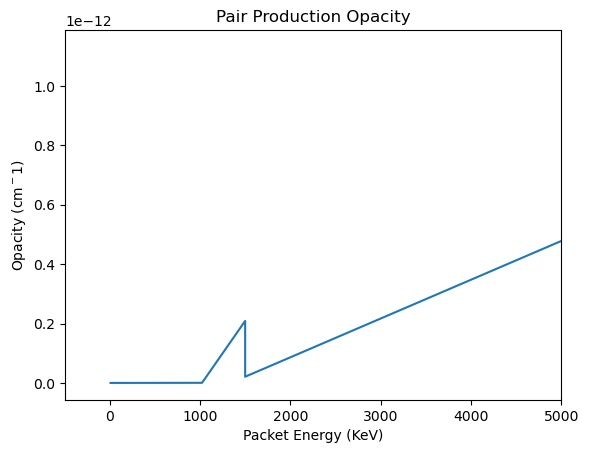

In [4]:
# The pair creation opacity function takes the packet energy, the ejecta density and the fraction of iron group elements
ejecta_density = 1e-10
x_ige = 0.05

# The pair creation function takes in one packet at a time, so we loop through the energy array to find the opacities at a given density and iron group fraction
pair_creation_opacities = np.zeros(len(energies))
for i in range(len(energies)):
    pair_creation_opacities[i] = pair_creation_opacity_calculation(energy=energies[i], ejecta_density=ejecta_density, iron_group_fraction=x_ige)

# We can then plot the opacity 
plt.plot(energies, pair_creation_opacities)
plt.xlabel("Packet Energy (KeV)")
plt.ylabel(f"Opacity (cm$^{-1}$)")
plt.xlim(right= 5000)
plt.title("Pair Production Opacity")

Text(0.5, 1.0, 'Compton Scattering Opacity')

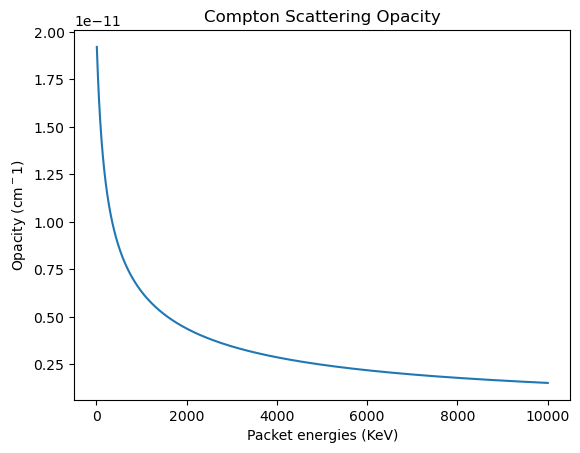

In [5]:
# The compton opacity function takes the packet energy and the electron density
electron_density = 3e13

compton_opacities = compton_opacity_calculation(energies, electron_density)

plt.plot(energies, compton_opacities)
plt.xlabel("Packet energies (KeV)")
plt.ylabel(f"Opacity (cm$^{-1}$)")
plt.title("Compton Scattering Opacity")

(5.0, 50.0)

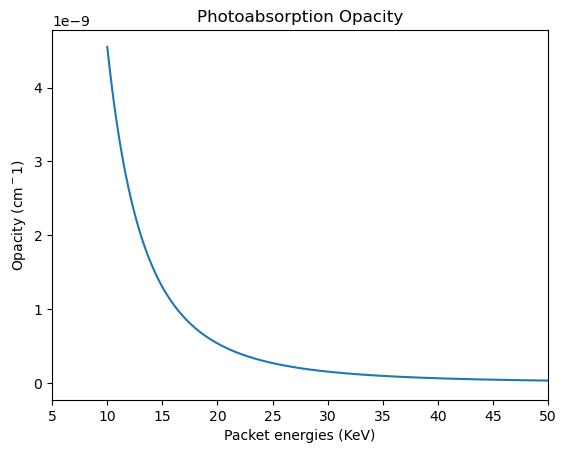

In [6]:
# The photoabsorption opacity function takes in the packet energy, ejecta density and the fraction of iron group elements
photoabsorption_opacities = photoabsorption_opacity_calculation(energy= energies, ejecta_density=ejecta_density, iron_group_fraction=x_ige)

plt.plot(energies, photoabsorption_opacities)
plt.xlabel("Packet energies (KeV)")
plt.ylabel(f"Opacity (cm$^{-1}$)")
plt.title("Photoabsorption Opacity")
plt.xlim(5,50)

The different forms of opacity are dominant at different energies which is evident when the opacities are plotted together.

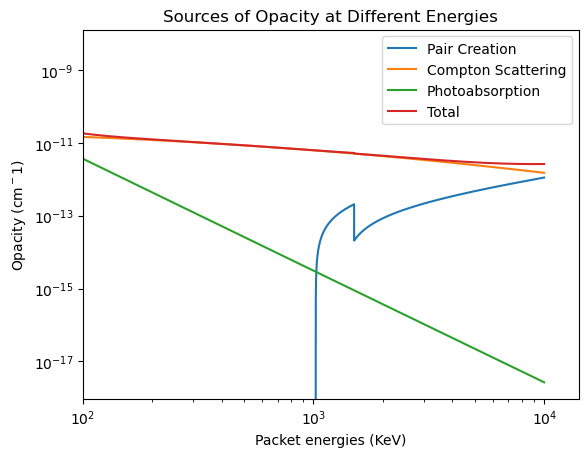

In [7]:
total_opacity = pair_creation_opacities + compton_opacities + photoabsorption_opacities

plt.plot(energies, pair_creation_opacities, label = "Pair Creation")
plt.plot(energies, compton_opacities, label= "Compton Scattering")
plt.plot(energies, photoabsorption_opacities, label= "Photoabsorption")
plt.plot(energies, total_opacity, label = "Total")
plt.xlabel("Packet energies (KeV)")
plt.ylabel(f"Opacity (cm$^{-1}$)")
plt.title("Sources of Opacity at Different Energies")
plt.yscale("log")
plt.xscale("log")
plt.xlim(left = 100)
plt.legend()

Text(0, 0.5, 'Fraction of Total Opacity')

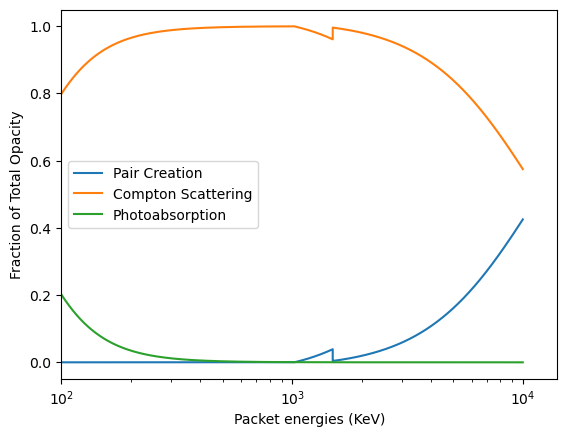

In [8]:
frac_pair_creation = pair_creation_opacities / total_opacity
frac_compton_scattering = compton_opacities / total_opacity
frac_photoabsorption = photoabsorption_opacities / total_opacity

plt.plot(energies, frac_pair_creation, label = "Pair Creation")
plt.plot(energies, frac_compton_scattering, label = "Compton Scattering")
plt.plot(energies, frac_photoabsorption, label = "Photoabsorption")
plt.xscale("log")
plt.xlim(left = 100)
plt.legend()
plt.xlabel("Packet energies (KeV)")
plt.ylabel("Fraction of Total Opacity")